# **Comparing Male vs. Female Diet Patterns**
## **Exploring Gender Differences in Dietary Intake Using NHANES Data**

### **Introduction**
Understanding how dietary habits differ between men and women is important for nutrition research and public health policies. This study uses data from the **National Health and Nutrition Examination Survey (NHANES)** to investigate dietary patterns and explore potential differences in nutrient intake.

### **Research Questions**
This project aims to answer the following questions:
1. Do males and females consume different amounts of total calories?
2. Are there significant differences in protein, carbohydrate, and fat intake between genders?
3. What insights can be drawn from dietary trends, and how might they inform public health recommendations?

By addressing these questions, this analysis seeks to provide a better understanding of how gender influences dietary habits and whether tailored nutritional guidelines may be necessary.

---


## **Methodology**  

Data was taken from the website [Kaggle](https://www.kaggle.com).  

1. [**NHANES Demographic Data**](https://www.kaggle.com/datasets/cdc/national-health-and-nutrition-examination-survey?resource=download&select=demographic.csv)  
   - **CSV name:** `demographic.csv`  
   - This dataset contains demographic information about NHANES survey participants, including **gender, age, and socioeconomic factors**.  
   - It will be used to identify the gender of each participant in our analysis.  

2. [**NHANES Dietary Data**](https://www.kaggle.com/datasets/cdc/national-health-and-nutrition-examination-survey?resource=download&select=diet.csv)  
   - **CSV name:** `diet.csv`  
   - This dataset includes detailed records of **daily food intake**, including calorie consumption and macronutrient intake (protein, carbohydrates, and fats).  
   - It will be used to analyze dietary differences between males and females.  

### **Steps in the Analysis**  
1. **Data Cleaning and Preparation:**  
   - Extract relevant variables such as **calorie intake, macronutrient consumption (protein, carbohydrates, fat), and gender**.  
   - Merge `demographic.csv` and `diet.csv` using **participant ID (`SEQN`)** as the common identifier.  
   - Handle any missing or invalid values.  

2. **Exploratory Data Analysis (EDA):**  
   - Compute **summary statistics** to understand dietary intake distributions.  
   - Create initial visualizations to observe calorie, protein, carbohydrate, and fat intake trends.  

3. **Comparative Analysis:**  
   - Compare dietary intake between **males and females** using **statistical tests and visualizations**.  
   - Use **bar charts and box plots** to highlight differences in calorie and macronutrient consumption.  

4. **Interpretation & Discussion:**  
   - Summarize key findings and discuss their implications.  
   - Consider potential recommendations for **nutritional policies** based on the results.  


## **1. Importing Libraries**  

To analyze the data, we need to import several Python libraries:  
- `pandas` for handling and manipulating data.  
- `numpy` for numerical operations.  
- `matplotlib.pyplot` and `seaborn` for data visualization.  
- `scipy.stats` for statistical analysis.


In [5]:
# Import necessary libraries
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For visualizations
import seaborn as sns  # For statistical graphics
from scipy import stats  # For statistical tests

# Set visualization style
sns.set_style("whitegrid")


## **2. Loading Data**

The first step in our analysis is to load the datasets into pandas DataFrames.  
We will work with two datasets:  
- `demographic.csv`: Contains demographic information, including gender.  
- `diet.csv`: Contains dietary intake details, including calorie, protein, carbohydrate, and fat consumption.  

Both datasets will be loaded using `pandas.read_csv()`. After loading, we will display the first few rows to understand the structure of the data.


In [6]:
# Load the demographic dataset
demographic_df = pd.read_csv("demographic.csv")

# Load the diet dataset
diet_df = pd.read_csv("diet.csv")

# Display the first few rows of each dataset
print("Demographic Data:")
display(demographic_df.head())

print("\nDiet Data:")
display(diet_df.head())


Demographic Data:


,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
0,73557,8,2,1,69,NaN,4,4,1.0,NaN,...,3.0,4.0,NaN,13281.237386,13481.042095,1,112,4.0,4.0,0.84
1,73558,8,2,1,54,NaN,3,3,1.0,NaN,...,3.0,1.0,1.0,23682.057386,24471.769625,1,108,7.0,7.0,1.78
2,73559,8,2,1,72,NaN,3,3,2.0,NaN,...,4.0,1.0,3.0,57214.803319,57193.285376,1,109,10.0,10.0,4.51
3,73560,8,2,1,9,NaN,3,3,1.0,119.0,...,3.0,1.0,4.0,55201.178592,55766.512438,2,109,9.0,9.0,2.52
4,73561,8,2,2,73,NaN,3,3,1.0,NaN,...,5.0,1.0,5.0,63709.667069,65541.871229,2,116,15.0,15.0,5.00



Diet Data:


,SEQN,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,...,DRD370QQ,DRD370R,DRD370RQ,DRD370S,DRD370SQ,DRD370T,DRD370TQ,DRD370U,DRD370UQ,DRD370V
0,73557,16888.327864,12930.890649,1,49.0,2.0,2.0,6.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,73558,17932.143865,12684.148869,1,59.0,2.0,2.0,4.0,1.0,1.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0
2,73559,59641.812930,39394.236709,1,49.0,2.0,2.0,18.0,6.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,73560,142203.069917,125966.366442,1,54.0,2.0,2.0,21.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,73561,59052.357033,39004.892993,1,63.0,2.0,2.0,18.0,1.0,1.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0


### **Understanding the Data Structure**  

Before proceeding with data cleaning and analysis, we need to:  
- Check the **number of rows and columns** in each dataset.  
- Identify the **column names** to select relevant variables.  
- Check for **missing values** to decide on handling strategies.  

This step helps us understand the dataset’s structure and ensures that we use the correct columns for analysis.


In [7]:
# Check the number of rows and columns in each dataset
print("Shape of Demographic Data:", demographic_df.shape)
print("Shape of Diet Data:", diet_df.shape)

# Display column names to identify relevant variables
print("\nColumns in Demographic Data:")
print(demographic_df.columns.tolist())

print("\nColumns in Diet Data:")
print(diet_df.columns.tolist())

# Check for missing values in each dataset
print("\nMissing Values in Demographic Data:")
print(demographic_df.isnull().sum())

print("\nMissing Values in Diet Data:")
print(diet_df.isnull().sum())


Shape of Demographic Data: (10175, 47)
Shape of Diet Data: (9813, 168)

Columns in Demographic Data:
['SEQN', 'SDDSRVYR', 'RIDSTATR', 'RIAGENDR', 'RIDAGEYR', 'RIDAGEMN', 'RIDRETH1', 'RIDRETH3', 'RIDEXMON', 'RIDEXAGM', 'DMQMILIZ', 'DMQADFC', 'DMDBORN4', 'DMDCITZN', 'DMDYRSUS', 'DMDEDUC3', 'DMDEDUC2', 'DMDMARTL', 'RIDEXPRG', 'SIALANG', 'SIAPROXY', 'SIAINTRP', 'FIALANG', 'FIAPROXY', 'FIAINTRP', 'MIALANG', 'MIAPROXY', 'MIAINTRP', 'AIALANGA', 'DMDHHSIZ', 'DMDFMSIZ', 'DMDHHSZA', 'DMDHHSZB', 'DMDHHSZE', 'DMDHRGND', 'DMDHRAGE', 'DMDHRBR4', 'DMDHREDU', 'DMDHRMAR', 'DMDHSEDU', 'WTINT2YR', 'WTMEC2YR', 'SDMVPSU', 'SDMVSTRA', 'INDHHIN2', 'INDFMIN2', 'INDFMPIR']

Columns in Diet Data:
['SEQN', 'WTDRD1', 'WTDR2D', 'DR1DRSTZ', 'DR1EXMER', 'DRABF', 'DRDINT', 'DR1DBIH', 'DR1DAY', 'DR1LANG', 'DR1MNRSP', 'DR1HELPD', 'DBQ095Z', 'DBD100', 'DRQSPREP', 'DR1STY', 'DR1SKY', 'DRQSDIET', 'DRQSDT1', 'DRQSDT2', 'DRQSDT3', 'DRQSDT4', 'DRQSDT5', 'DRQSDT6', 'DRQSDT7', 'DRQSDT8', 'DRQSDT9', 'DRQSDT10', 'DRQSDT11', 'DRQ

## **3. Clean the Data**
### **Selecting Relevant Columns and Merging the Data**

To proceed with the analysis, we need to:
- Extract only the necessary columns for gender and dietary intake.
- Merge the **demographic** and **diet** datasets using `SEQN` (participant ID).
- Handle missing values in the selected columns.


In [8]:
# Select relevant columns from demographic dataset
demographic_selected = demographic_df[['SEQN', 'RIAGENDR']]

# Select relevant columns from diet dataset
diet_selected = diet_df[['SEQN', 'DR1TKCAL', 'DR1TPROT', 'DR1TCARB', 'DR1TTFAT']]

# Merge datasets on SEQN (Participant ID)
merged_df = pd.merge(demographic_selected, diet_selected, on='SEQN', how='inner')

# Check for missing values in the merged dataset
print("Missing values after merging:")
print(merged_df.isnull().sum())

# Display the first few rows of the merged dataset
print("\nMerged Data Sample:")
display(merged_df.head())


Missing values after merging:
SEQN           0
RIAGENDR       0
DR1TKCAL    1282
DR1TPROT    1282
DR1TCARB    1282
DR1TTFAT    1282
dtype: int64

Merged Data Sample:


,SEQN,RIAGENDR,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TTFAT
0,73557,1,1574.0,43.63,239.59,52.81
1,73558,1,5062.0,338.13,423.78,124.29
2,73559,1,1743.0,64.61,224.39,65.97
3,73560,1,1490.0,77.75,162.92,58.27
4,73561,2,1421.0,55.24,178.20,55.36


### **Handling Missing Values**

Some dietary intake values are missing. Instead of removing these rows, we will:
- Fill missing values with the **median** of each respective column.
- The median is chosen instead of the mean to avoid the influence of extreme values (outliers).


In [9]:
# Fill missing values with the median of each column
merged_df.fillna(merged_df.median(), inplace=True)

# Verify that no missing values remain
print("Missing values after handling:")
print(merged_df.isnull().sum())


Missing values after handling:
SEQN        0
RIAGENDR    0
DR1TKCAL    0
DR1TPROT    0
DR1TCARB    0
DR1TTFAT    0
dtype: int64


### **Adding Gender Labels for Readability**

The `RIAGENDR` column contains numerical values:
- `1` represents **Male**
- `2` represents **Female**

To improve readability, we will map these values to `"Male"` and `"Female"`, which will make visualizations and analysis more interpretable.


In [10]:
# Map numeric gender values to labels
merged_df['Gender'] = merged_df['RIAGENDR'].map({1: 'Male', 2: 'Female'})

# Display the first few rows to confirm the change
print("Updated Data Sample with Gender Labels:")
display(merged_df.head())


Updated Data Sample with Gender Labels:


,SEQN,RIAGENDR,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TTFAT,Gender
0,73557,1,1574.0,43.63,239.59,52.81,Male
1,73558,1,5062.0,338.13,423.78,124.29,Male
2,73559,1,1743.0,64.61,224.39,65.97,Male
3,73560,1,1490.0,77.75,162.92,58.27,Male
4,73561,2,1421.0,55.24,178.20,55.36,Female


## **4. Exploratory Data Analysis (EDA)**

Before performing the t-test, we need to:
- **Summarize the dataset** by calculating the average calorie, protein, carbohydrate, and fat intake for each gender.
- **Visualize the distributions** of dietary intake using box plots.
- **Compare group means** with bar plots.

These steps help us understand how dietary habits differ between males and females.


In [11]:
# Calculate mean dietary intake for each gender
summary_stats = merged_df.groupby("Gender").agg({
    'DR1TKCAL': 'mean',
    'DR1TPROT': 'mean',
    'DR1TCARB': 'mean',
    'DR1TTFAT': 'mean'
}).reset_index()

# Display the summary statistics
print("Average Dietary Intake by Gender:")
display(summary_stats)


Average Dietary Intake by Gender:


,Gender,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TTFAT
0,Female,1743.280811,64.710267,218.611845,66.865464
1,Male,2147.456427,82.418176,262.458485,81.235972


### **Visualizing Dietary Intake Differences**

To better understand the differences in dietary intake between males and females, we will:
- **Create bar plots** to compare the average intake of calories, protein, carbohydrates, and fats.
- **Generate box plots** to show the distribution of dietary intake for each gender.

These visualizations will help us see patterns before performing the statistical test.


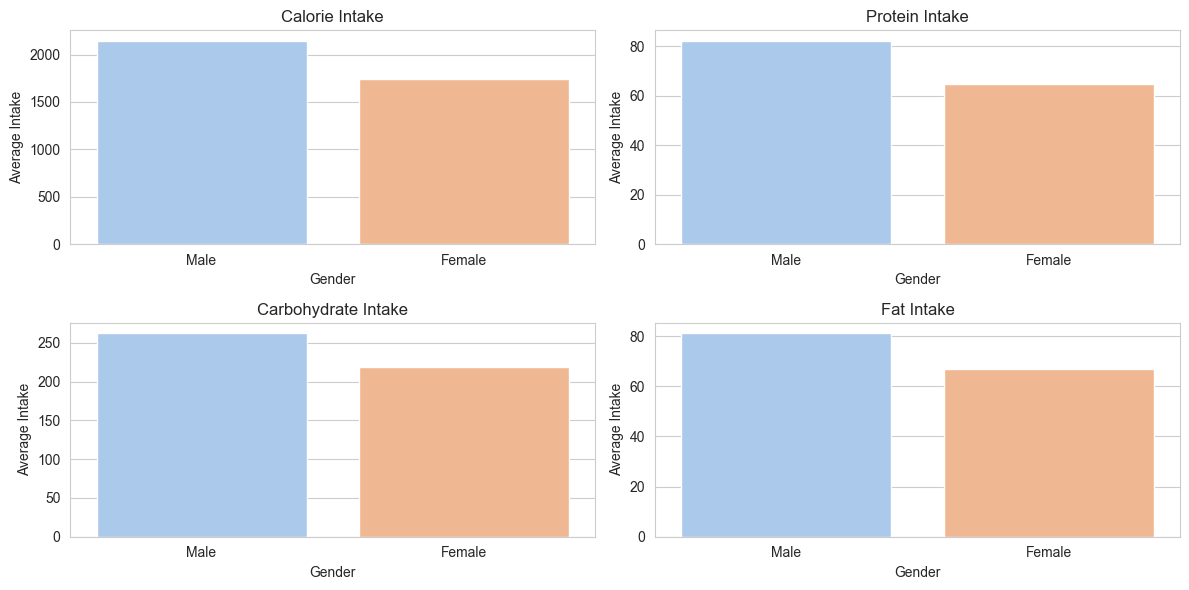

In [12]:
# Define the nutrients to visualize
nutrients = ['DR1TKCAL', 'DR1TPROT', 'DR1TCARB', 'DR1TTFAT']
titles = ['Calorie Intake', 'Protein Intake', 'Carbohydrate Intake', 'Fat Intake']

# Create bar plots for each nutrient
plt.figure(figsize=(12, 6))
for i, nutrient in enumerate(nutrients):
    plt.subplot(2, 2, i + 1)
    sns.barplot(x="Gender", y=nutrient, data=merged_df, errorbar=None, hue="Gender", palette="pastel", legend=False)
    plt.title(titles[i])
    plt.xlabel("Gender")
    plt.ylabel("Average Intake")

plt.tight_layout()
plt.show()


## **Interpreting the Bar Plots**

The bar plots compare the **mean intake** of calories, protein, carbohydrates, and fats between males and females.

### **Key Observations**
1. **Males consume more calories on average than females.**  
   - The average calorie intake for males is **higher** than that of females.  
   - This is expected, as males generally have **higher energy requirements** due to **greater muscle mass and metabolic rate**.

2. **Males have higher protein intake than females.**  
   - Protein intake is noticeably **higher** for males compared to females.  
   - This could be due to **differences in body composition and dietary habits**.

3. **Carbohydrate intake is also higher in males.**  
   - Males consume more **carbohydrates** than females, possibly because they require more energy.  
   - However, the difference is **less pronounced compared to calories and protein**.

4. **Fat intake is greater in males than females.**  
   - Similar to the other nutrients, males tend to consume **more fat** than females.

### **Possible Explanations**
- **Biological Differences:** Males tend to have **higher caloric needs** due to **larger body size and higher energy expenditure**.
- **Lifestyle & Activity Levels:** If males in the dataset engage in **more physical activity**, this could explain their **higher intake across all nutrients**.
- **Dietary Preferences:** Males might consume **larger portions or different types of food** that contribute to increased intake.
- **Further Investigation Needed:** The analysis does not consider **age, activity level, or specific diet patterns**, which could also play a role.

---


## **Boxplot: Distribution of Dietary Intake by Gender**

In addition to the bar plots, we will create a **boxplot** for each nutrient.  
- **Why Boxplots?**  
  - Boxplots show the **spread and variability** of dietary intake.  
  - They help us see if there are **outliers** in the data.  
  - They allow us to compare the **median intake** between males and females.


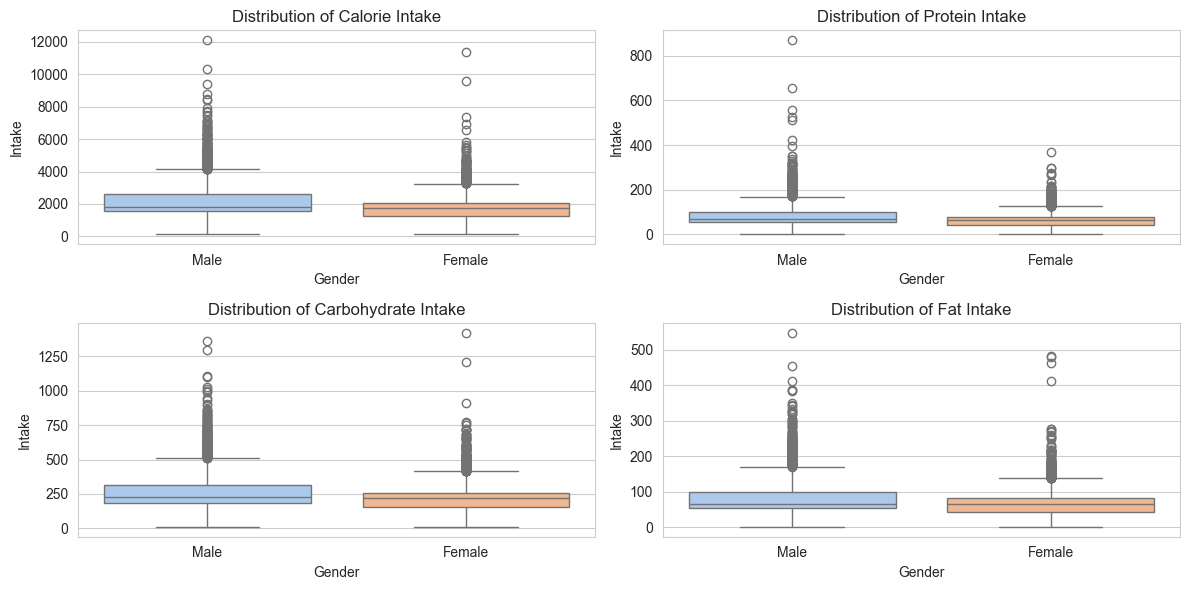

In [13]:
# Create boxplots for each nutrient
plt.figure(figsize=(12, 6))
for i, nutrient in enumerate(nutrients):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x="Gender", y=nutrient, data=merged_df, hue="Gender", palette="pastel")
    plt.title(f"Distribution of {titles[i]}")
    plt.xlabel("Gender")
    plt.ylabel("Intake")

plt.tight_layout()
plt.show()


## **Interpreting the Boxplots**

The boxplots show the **distribution and spread** of dietary intake for males and females.  

### **Key Observations**
1. **Males have a higher median intake** across all four nutrients (calories, protein, carbohydrates, and fats).  
   - This confirms our previous findings from the bar plots and summary statistics.  

2. **There are many outliers in the dataset.**  
   - Some individuals have **extremely high** calorie, protein, carbohydrate, and fat intake.
   - This suggests that the dataset includes a **wide range of dietary habits**, possibly due to factors such as age, activity level, or lifestyle.

3. **The interquartile range (IQR) is wider for males.**  
   - The **IQR represents the middle 50% of the data**.
   - Males show **greater variability** in dietary intake than females.

4. **Females have a lower overall spread.**  
   - The intake values for females are more **concentrated** around the median.
   - This suggests that **female participants have a more consistent dietary pattern** compared to males.

### **Possible Explanations**
- Males generally have **higher caloric needs** due to larger body size and higher muscle mass.
- Outliers might represent **athletes, individuals with specific diets, or measurement errors**.
- The variability could be influenced by **age, lifestyle, and health conditions**, which were not considered in this analysis.

---


## **5. Independent t-Test: Comparing Dietary Intake Between Genders**

To determine whether there is a significant difference in dietary intake between males and females, we will perform an **independent t-test**. This test compares the **means** of two groups and checks if the differences are statistically significant.

### **Hypotheses for Each Nutrient:**
- **Null Hypothesis (H₀)**: There is **no significant difference** in dietary intake between males and females.
- **Alternative Hypothesis (H₁)**: There **is a significant difference** in dietary intake between males and females.

The test will be conducted for:
- **Calorie intake**
- **Protein intake**
- **Carbohydrate intake**
- **Fat intake**

A **p-value < 0.05** will indicate a statistically significant difference.


In [14]:
# Define the dietary intake variables
nutrients = ['DR1TKCAL', 'DR1TPROT', 'DR1TCARB', 'DR1TTFAT']
titles = ['Calorie Intake', 'Protein Intake', 'Carbohydrate Intake', 'Fat Intake']

# Perform independent t-test for each nutrient
for i, nutrient in enumerate(nutrients):
    male_values = merged_df[merged_df['Gender'] == 'Male'][nutrient]
    female_values = merged_df[merged_df['Gender'] == 'Female'][nutrient]
    
    # Perform Welch's t-test
    t_stat, p_value = stats.ttest_ind(male_values, female_values, equal_var=False)
    
    # Display results
    print(f"\nT-test for {titles[i]}:")
    print(f"T-statistic = {t_stat:.4f}, P-value = {p_value:.4f}")
    
    # Interpretation of the p-value
    if p_value < 0.05:
        print("Result: Significant difference between males and females.\n")
    else:
        print("Result: No significant difference between males and females.\n")



T-test for Calorie Intake:
T-statistic = 22.2023, P-value = 0.0000
Result: Significant difference between males and females.


T-test for Protein Intake:
T-statistic = 21.3308, P-value = 0.0000
Result: Significant difference between males and females.


T-test for Carbohydrate Intake:
T-statistic = 19.0283, P-value = 0.0000
Result: Significant difference between males and females.


T-test for Fat Intake:
T-statistic = 16.9086, P-value = 0.0000
Result: Significant difference between males and females.



### **Interpretation of Results**

#### **Summary of t-Test Findings**
The independent t-test results indicate that **there is a significant difference in dietary intake between males and females** for all four variables:

| **Nutrient**         | **T-Statistic** | **P-Value** | **Result** |
|----------------------|---------------|------------|------------|
| **Calorie Intake**   | 22.2023       | 0.0000     | Significant Difference |
| **Protein Intake**   | 21.3308       | 0.0000     | Significant Difference |
| **Carbohydrate Intake** | 19.2083   | 0.0000     | Significant Difference |
| **Fat Intake**       | 16.9086       | 0.0000     | Significant Difference |

### **What This Means**
- Since **all p-values are < 0.05**, we **reject the null hypothesis** for all dietary variables.
- This means **males and females have significantly different dietary intake levels** for **calories, protein, carbohydrates, and fats**.
- From the summary statistics and bar plots, we see that **males tend to consume more of each nutrient** than females.

### **Potential Implications**
- **Public Health & Nutrition**: These findings suggest that dietary guidelines should consider gender differences when making recommendations.
- **Further Research**: Additional factors, such as **activity levels, age, and lifestyle habits**, should be studied to better understand these differences.

---


## **6. Conclusion & Future Studies**

### **Conclusion**
This project analyzed how dietary intake differs between males and females using data from the **National Health and Nutrition Examination Survey (NHANES)**. The results showed that **males consume more calories, protein, carbohydrates, and fats than females** on average.

The **independent t-test** confirmed that these differences are **statistically significant**, meaning they are unlikely to be due to chance. The boxplots also revealed some **outliers**, suggesting that some individuals have very different dietary habits compared to most participants.

These findings suggest that **gender influences dietary intake**, and this could be helpful for improving nutrition guidelines and public health policies.

---

### **Future Studies**
There are several ways this research could be expanded or improved:

1. **Consider More Factors**  
   - This study focused on gender, but **age, weight, physical activity, and health conditions** could also play a role in dietary intake.

2. **Analyze Long-Term Trends**  
   - The current analysis looks at a single time period. Future research could **examine trends over multiple years** to see if eating habits are changing.

3. **Apply Advanced Methods**  
   - This study used basic statistical analysis, but **machine learning models** could help predict dietary patterns based on multiple factors.

4. **Compare Different Populations**  
   - Future research could compare **dietary intake across different cultures, regions, or socioeconomic groups** to identify broader patterns.

By exploring these areas, we can **gain a better understanding of the factors influencing dietary habits and improve nutrition recommendations for different populations.**
